# Python introduction

This notebook uses two additional files to run: BoM_SOI.csv and sst_anom_nino34.nc

## Modules
A module is a file consisting of Python code. Load these at the start.


In [1]:
import random
import numpy as np
import xarray as xr
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

Write your code and each cell and press shift enter to execute the code. The output will be shown below.

In [2]:
2/4

0.5

Only the last line of code will be shown below, unless you use a print statement.

In [3]:
print(2**3)
print(1+1)

8
2


As we can see, only the result in the print statement and the result of the last line was shown.

# Comments

Use # to write comments that will not be interpreted as python code.

In [4]:
# This is a comment.

## Variables

You can name an object (e.g. a number or letter). Note that variables are case sensitive - lower case and capitals will not be interpreted as the same thing.

In [5]:
x = 4
print(x)

4


In [6]:

X = 5
print(x, X) # Use a comma to separate two variables in print statements. A space will automatically be added.

4 5


## Strings

Strings represent characters and you can create a string using single or double quotation marks. 

In [7]:
a = 'Hello'
b = 'World'
print(a, b)

Hello World


You can add strings together. Note that a space will not be added between two strings (it was the print function that did that),

In [8]:
print(a+b)

HelloWorld


Strings can be numbers, but they will not be interpreted as numbers and you cannot add a string and a number.

In [9]:
c = "4"
d = '5'
print(c + d)

45


In [10]:
e = 6
print(c + e)

TypeError: can only concatenate str (not "int") to str

As expected, we got an error when trying to add the string and number together. Concatenate means to link (things) together in a chain or series.

We can, however, convert strings to numbers and vice versa.

In [ ]:
# Convert float to string using str()
print(c + str(e))

The format function. We can use curly brackets as placeholders to insert strings or numbers into another string. It means we don't have to worry about string/number conversion (because it does it for us).

In [ ]:
print('c={}, d={}'.format(c, d))

In [ ]:
print('c={}, d={}'.format('d', 5.23546))

We can also use it to round decimals. First use ':' and then specify the number of decimal places. In the next case we use '.2' to indicate two decimal places. the 'f' means a floating point number, which is basically just the name for a decimal.

In [11]:
print('c={:.2f}, d={:.0f}'.format(1.125, 5.23546))

c=1.12, d=5


### Booleans (True/False)

In [12]:
var1 = 4
var2 = 5
print(var1 == var2) # Double equal signs means to check equality (not make it equal).

False


As expected, four does not equal five.

## Arrays

Arrays and lists are both used in Python to store data, but they don't serve exactly the same purposes. They both can be used to store any data type (real numbers, strings, etc). 

We mostly want to use arrays, so for that we use numpy (which we shortened at the start to be called np).

Lists are created using square brackets and each item (or element) is seperated with a comma.

We can select elements using their position (called indexing).

In [13]:
y = [1, 2, 3, 4, 5] # List not array!
print(y)
print(y[4]) # First element of y
print(y[-3]) # Last element of y

[1, 2, 3, 4, 5]
5
3


In [14]:
# Converting our list to an array.
z = np.array([1, 2, 3, 4, 5])
print(z)

[1 2 3 4 5]


In [15]:
z[0]

1

In [16]:
# We can created the same array using the numpy arange function.
np.arange(1, 11, 2)

array([1, 3, 5, 7, 9])

Note that it starts at zero, not one and goes to four not five.

In [17]:
# Start at one and end at three.
np.arange(1, 4)

array([1, 2, 3])

In [18]:
# We can check that each element in y is the same as z.
y == z

array([ True,  True,  True,  True,  True])

In [19]:
# We can also check that all elements in y is the same as z.
all(y == z)

True

We can also create 2D arrays, which are like multiple arrays stored as the same variable. 

In [20]:
x = np.array([[1, 2, 3], [26, 27, 18]])
x

array([[ 1,  2,  3],
       [26, 27, 18]])

In [21]:
# Select the first row.
x[0, :]

array([1, 2, 3])

In [22]:
# Select the first column in row one.
x[:, 0]

array([ 1, 26])

## Xarray DataArray

Xarray (and similarily pandas) allows use to give names to each row and coumns in arrays (and generally make things easier for us)

In [23]:
time = [2010, 2011, 2012, 2013, 2014]
temp = np.array([[20, 21, 22, 23, 24], [10, 11, 12, 13, 14]])
depth = [0, 10]
np.shape(temp)

(2, 5)

In [24]:
ds = xr.DataArray(temp, dims=('depth', 'time'), coords={'depth': depth, 'time': time})
ds

<xarray.DataArray (depth: 2, time: 5)>
array([[20, 21, 22, 23, 24],
       [10, 11, 12, 13, 14]])
Coordinates:
  * depth    (depth) int32 0 10
  * time     (time) int32 2010 2011 2012 2013 2014

In [25]:
ds.time

<xarray.DataArray 'time' (time: 5)>
array([2010, 2011, 2012, 2013, 2014])
Coordinates:
  * time     (time) int32 2010 2011 2012 2013 2014

In [26]:
ds.depth

<xarray.DataArray 'depth' (depth: 2)>
array([ 0, 10])
Coordinates:
  * depth    (depth) int32 0 10

In [27]:
ds.sel(depth=0, time=2010)

<xarray.DataArray ()>
array(20)
Coordinates:
    depth    int32 0
    time     int32 2010

In [28]:
ds.depth.isel(depth=1)

<xarray.DataArray 'depth' ()>
array(10)
Coordinates:
    depth    int32 10

# Opening Excel (.csv) files using pandas

To open .csv files, we will use pandas. You need to specify the path to the file (use forward slashes only). For this example, we'll open Southern Oscillation Index (SOI) values that I downloaded from the Bureau of Meteorology website.

In [29]:
path = 'C:\\Users\\astel\\Documents\\GitHub\\scix_mhws\\data\\'

In [30]:
# Since we have dates, you should tell the reader so that it knows how to convert them properly.
soi = pd.read_csv(path + 'BoM_SOI.csv', parse_dates=[0])
soi

,time,soi
0,1982-01-01,9.4
1,1982-02-01,0.6
2,1982-03-01,2.4
3,1982-04-01,-3.8
4,1982-05-01,-8.2
...,...,...
449,2019-06-01,-10.4
450,2019-07-01,-5.6
451,2019-08-01,-4.4
452,2019-09-01,-12.4


In [31]:
# We can access elements like we did for the xarray example. In fact, xarray is based on pandas.
# Show the first 10 elements of time.
soi.time[0:10]

0   1982-01-01
1   1982-02-01
2   1982-03-01
3   1982-04-01
4   1982-05-01
5   1982-06-01
6   1982-07-01
7   1982-08-01
8   1982-09-01
9   1982-10-01
Name: time, dtype: datetime64[ns]

In [32]:
soi.head()

,time,soi
0,1982-01-01,9.4
1,1982-02-01,0.6
2,1982-03-01,2.4
3,1982-04-01,-3.8
4,1982-05-01,-8.2


# Opening netcdf files (.nc) using xarray

For this example, we will open a sea surface temperature (SST) anomaly (i.e. SST minus the climatology) averaged over the middle of the Pacific Ocean.

In [33]:
sst = xr.open_dataset(path + 'sst_anom_nino34.nc')
sst.nino34

<xarray.DataArray 'nino34' (time: 456)>
array([-0.307245, -0.133358, -0.457694, ...,  0.638458,  0.430579,  0.181262],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2019-08-01
Attributes:
    long_name:  Monthly SST anomalies averaged over the Nino 3.4 region

There is one coordinate (time) and one variable (nino34) and a lot of metadata (like who made it, etc)

In [34]:
sst.nino34

<xarray.DataArray 'nino34' (time: 456)>
array([-0.307245, -0.133358, -0.457694, ...,  0.638458,  0.430579,  0.181262],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2019-08-01
Attributes:
    long_name:  Monthly SST anomalies averaged over the Nino 3.4 region

In [35]:
sst.nino34.sel(time='1981-09-01')

<xarray.DataArray 'nino34' ()>
array(-0.307245, dtype=float32)
Coordinates:
    time     datetime64[ns] 1981-09-01
Attributes:
    long_name:  Monthly SST anomalies averaged over the Nino 3.4 region

C:\Users\astel\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


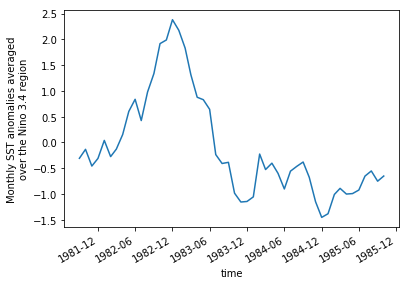

In [36]:
# Only showing the first 50 times (otherwise it is really slow).
# Note that isel and sel are different. isel takes the index i.e. 0 or 1, while sel takes the actual value (like the date).
sst.nino34.isel(time=slice(0, 50)).plot()

# Python Statistics

(array([ 13.,  30.,  76., 100., 109.,  70.,  32.,  15.,   9.,   2.]),
 array([-2.0952559 , -1.5824045 , -1.0695533 , -0.5567019 , -0.04385061,
         0.4690007 ,  0.981852  ,  1.4947033 ,  2.0075545 ,  2.520406  ,
         3.0332572 ], dtype=float32),
 <a list of 10 Patch objects>)

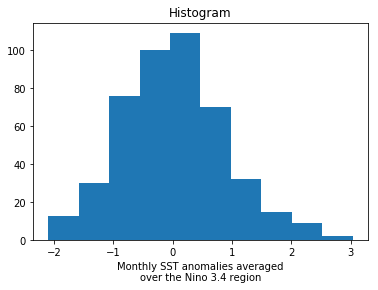

In [37]:
# Calculate the mean.
sst.nino34.plot.hist()

In [38]:
# This does the same thing as before.
np.mean(sst.nino34)

<xarray.DataArray 'nino34' ()>
array(0.02626, dtype=float32)

In [40]:
sst.nino34

<xarray.DataArray 'nino34' (time: 456)>
array([-0.307245, -0.133358, -0.457694, ...,  0.638458,  0.430579,  0.181262],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2019-08-01
Attributes:
    long_name:  Monthly SST anomalies averaged over the Nino 3.4 region

In [41]:
# Calculate the 50th percentile (which should be the same as the median).
np.percentile(sst.nino34, 50)

-0.0015155508008319885

In [42]:
# The 10th and 90th percentile.
print(np.percentile(sst.nino34, 10))
print(np.percentile(sst.nino34, 90))

-1.0047260522842407
1.1451141238212585


# Correlation and linear regression

Correlation quantifies the direction and strength of the relationship between two numeric variables, x and y, and always lies between -1.0 and 1.0. 

A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive correlation. A correlation of 0.0 shows no relationship between the movement of the two variables.  A calculated number greater than 1.0 or less than -1.0 means that there was an error in the correlation measurement. 


Simple linear regression relates X to Y through an equation of the form y = mx + b

In [43]:
x = np.arange(20) # e.g. 0, 1, 2, 3, ... 19

# y will be similar to x, except we'll add some randomness (i.e. a random number between -4 and 4).
y = x + [random.uniform(-4, 4) for _ in range(20)]
y

array([ 3.1367829 ,  2.3188005 , -0.17755476,  0.91292714,  6.83026728,
        3.90584616,  5.29029333,  4.77341149,  6.74440702, 11.22215764,
       11.56728384, 10.08916313, 13.27158413, 16.79713609, 14.72191283,
       14.37085726, 18.29450664, 16.36133748, 15.75310368, 19.92020281])

Text(0.5,1,'Linear correlation example')

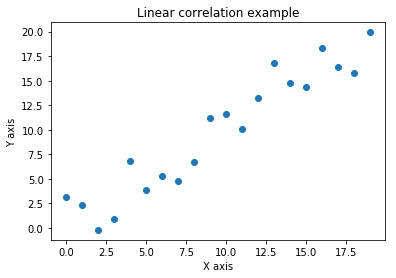

In [49]:
fig = plt.figure(figsize=(6, 4)) # Define the figure size: 5 inches width and 4 inches length.
plt.scatter(x, y)
# Add some labels to the axes.
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Linear correlation example')

Lets find the correlation coefficient (r) and the associated p-value (p). For this we will use the Pearson R test.

More information: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html

In [45]:
stats.pearsonr(x, y) 

(0.9503792692192922, 1.4458345564740864e-10)

This returns the correlation coefficient (r) and the p-value. As expected, the correlation coefficient is close to one and the p-value is very small (e-14 means it is the 14th decimal place). Basically, this means our data is very close to a straight line and it is highly improbable that it is due to random chance. After all, we did just add a small bit of randomness to a straight line.

If the number was close to -1, it just means it is close to a straight line with a downwards slope. 

If, for example, we chose a confidence interval of 95% or p < 0.05 (as most studies do) then our result IS statistically significant. (p=3.9e-11 actually means 0.000000000039)

Let's add a line of best fit.

Text(0.5,1,'Linear correlation example')

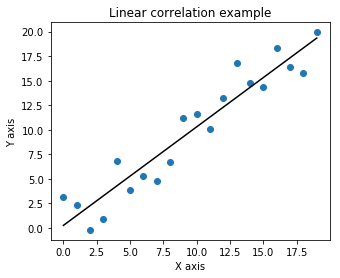

In [50]:
fig = plt.figure(figsize=(5, 4)) # Define the figure size: 5 inches width and 4 inches length.
plt.scatter(x, y)
# Add some labels to the axes.
plt.xlabel('X axis')
plt.ylabel('Y axis')
# Add the line of best fit (and color it red).
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='k')
plt.title('Linear correlation example')

Lets see what happens when have very random data.

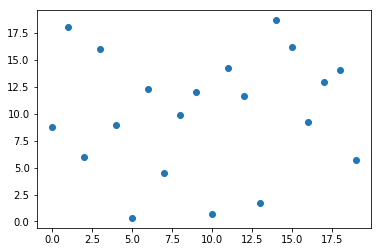

In [53]:
# Create an array of twenty random numbers between 0 and 20.
Y = np.array([random.uniform(0, 20) for _ in range(20)])
plt.scatter(x, Y)

Now, this example doesn't at all look like a line. So we expect the correlation coefficent to be close to zero and a large p-value.

In [54]:
stats.pearsonr(x, Y) 

(0.07712428273759532, 0.746556314331247)

As expected, R is close to zero and the p-value is quite high.


# t-test

A t-test is a type of statistic used to determine if there is a significant difference between the means of two groups, which may be related in certain features.

In [55]:
# Lets make up some temperature data, that randomly fluctuates between 15 and 25 degrees C (for temp1)
time = np.arange(50)
temp1 = np.array([random.uniform(15, 25) for _ in range(50)]) # Random numbers between 15 and 25
temp2 = np.array([random.uniform(20, 30) for _ in range(50)]) # Random numbers between 20 and 30

We expect the mean of temp1 to be around 20C and the mean of temp2 to be around 25C. 

In [56]:
print('The mean of temp1 is:', np.mean(temp1))
print('The mean of temp2 is:', np.mean(temp2))

The mean of temp1 is: 19.734454539502373
The mean of temp2 is: 24.227623046772578


Lets plot temp1 to see how it looks.

Text(0.5,0,'Time [seconds]')

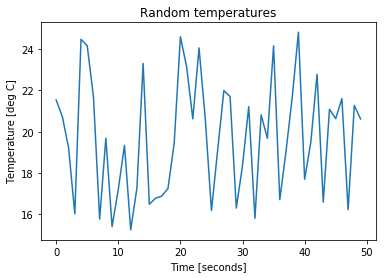

In [57]:
plt.title('Random temperatures')
plt.plot(time, temp1)
plt.ylabel('Temperature [deg C]')
plt.xlabel('Time [seconds]')

In [ ]:
plt.title('Random temperatures')
plt.plot(time, temp1)

plt.axhline(np.mean(temp1), color='r')

plt.ylabel('Temperature [deg C]')
plt.xlabel('Time [seconds]')

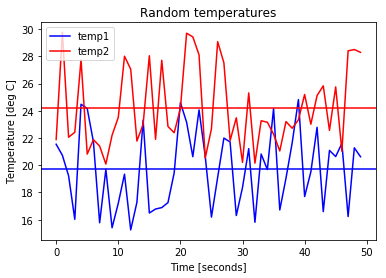

In [58]:
plt.title('Random temperatures')
plt.plot(time, temp1, color='blue', label='temp1')
plt.plot(time, temp2, color='red', label='temp2')

plt.axhline(np.mean(temp1), color='blue')
plt.axhline(np.mean(temp2), color='red')


plt.ylabel('Temperature [deg C]')
plt.xlabel('Time [seconds]')

# Add the labels to a legend
plt.legend()

Now we know the means between the two temperature data sets are different, but exactly how different are they and could the difference just be due to random chance?

For this we will use the independent t-test

for more information: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

First, we will see what happens when we try to see the difference between the same thing:

In [59]:
stats.ttest_ind(temp1, temp1)

Ttest_indResult(statistic=0.0, pvalue=1.0)

We are only really interested in the p-value, which is one. That means there is no difference.

In [61]:
stats.ttest_rel(temp1, temp2)

Ttest_relResult(statistic=-8.287777824867751, pvalue=6.959874988332908e-11)

The p value is around 0.0000000000095, which means there is a very low chance the numbers are different due to random chance.

If we were using paired samples, such as height measurements of people at two different times, we would use the dependent t-test.

Just change stats.ttest_ind(x, y) to stats.ttest_red(x, y).

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

# Errors and debugging

Errors, it's not a matter of if - it's a matter of when. You can generally ignore most warning (usually coloured pink), but if there is an error - your code won't execute and you will get an error message.

But, don't panic - the error you will make are usually easy to fix and the error message will tell you where the error is.

In coding, brackets are important and they ALWAYS have to be close. 

In [62]:
print('testing'

SyntaxError: unexpected EOF while parsing (<ipython-input-62-7d49ea6a82c0>, line 1)

A syntax error means an error to the spelling and grammar. The error message even shows us where exactly we missed something, in this case it was the bracket.

In [63]:
print('testing)

SyntaxError: EOL while scanning string literal (<ipython-input-63-a82f8ba62367>, line 1)

In this case, we forgot the last quotation mark.

NameError: name 'k' is not defined

Name error - we haven't called anything 'var' before. This error may commonly occur when we recently open a notebook and we can see all the output, but the session ended when we last closed the notebook - so nothing has been saved into memory yet. Check to see if you have run all the cells yet, or check if you made a typo in the variable name.

Indents mean a very specific thing in python. Unless you are using a for or while loop (which we haven't covered yet) - make sure all lines of code do not have and spaces before them.

In the next example, i just pressed tab before the print statement.

In [67]:
c = 0
print(c)

0
